# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: Classification. Result is dicrate variable. Data are not continous.**

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


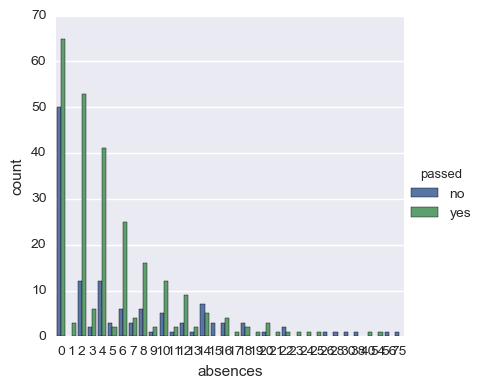

In [2]:
n_students = len(student_data)

n_features = len(student_data.columns[:-1])

passed = student_data.loc[student_data['passed'] == 'yes']

n_passed = len(passed)

n_failed = n_students - n_passed

grad_rate = 100.0 * n_passed / n_students

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

import seaborn as sns
%matplotlib inline
# sns.factorplot("failures", col="paid", data=student_data, hue='passed', kind="count")
sns.factorplot(x='absences', data=student_data, hue='passed', kind='count')

## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
from sklearn.cross_validation import train_test_split
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

63      no
245    yes
154    yes
311    yes
81     yes
344    yes
336    yes
124     no
250     no
89      no
181    yes
21     yes
170     no
206     no
173     no
49      no
358    yes
196    yes
92      no
221     no
218     no
355     no
134     no
175     no
22     yes
241    yes
122    yes
176    yes
162     no
145    yes
      ... 
243    yes
115    yes
265    yes
72      no
333     no
25      no
165    yes
337     no
379    yes
174     no
381     no
39     yes
193    yes
314    yes
88     yes
70     yes
87     yes
292    yes
242     no
277     no
211    yes
9      yes
359    yes
195    yes
251    yes
323    yes
192     no
117    yes
47     yes
172    yes
Name: passed, dtype: object
Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: 

Applications: Spam detection, Image recognition, Gerrymandering.

SVM:

APPLICATIONS

SVMs are helpful in text and hypertext categorization as their application can significantly reduce the need for labeled training instances in both the standard inductive and transductive settings. Classification of images can also be performed using SVMs.Hand-written characters can be recognized using SVM. The SVM algorithm has been widely applied in the biological and other sciences.

STRENGTHS

Effective in high dimensional spaces. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.Versatile: different Kernel functions can be specified for the decision function.

WEAKNESSES

If the number of features is much greater than the number of samples, the method is likely to give poor performances. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation 

REASONS FOR CHOOSING
Number of feature is smaller then number of samples. A good candidate for the first model.

Decision Trees:

APPLICATIONS

Decision trees are useful for classification and regression in many fields, including Medical diagnosis, Manufacturing, and Insurance.

STRENGTHS

Decision Trees models are interpretable, and people understand the concept of decision splits.
Can exploit high variance by using the decision tree as the base learner to an ensemble model like random forest

WEAKNESSES

Decision Trees get very complex and overfit on small/medium size datasets.
(but we can regularize a decision tree by pruning tree depth or other parameters)

REASONS FOR CHOOSING

As a non-linear classifier it may be able to predict the data well.
Also nice that it can produce a model which can be interpreted by the school board.

Ensemble methods:

APPLICATIONS

Credit scoring, Netflix challenge

STRENGTHS

On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

WEAKNESSES

If we use the wrong ensemble method for our setting, we are not going to do better. For example, using Bagging with a biased model is not going to help.

Also, if we need to work in a probabilistic setting, ensemble methods may not work either. It is known(https://arxiv.org/ftp/arxiv/papers/1207/1207.1403.pdf) that Boosting (in its most popular forms like AdaBoost) delivers poor probability estimates.

REASONS FOR CHOOSING

The motivation is to combine several weak models to produce a powerful ensemble.

**

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [14]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

clf_A = svm.SVC(random_state=0)
clf_B = tree.DecisionTreeClassifier(random_state=0)
clf_C = RandomForestClassifier(random_state=0)

for clf in [clf_A, clf_B, clf_C]:
    for size in [100, 200, 300]:
        train_predict(clf, X_train[:size], y_train[:size], X_test, y_test)

Training a SVC using a training set size of 100. . .
Trained model in 0.0016 seconds
Made predictions in 0.0008 seconds.
F1 score for training set: 0.8591.
Made predictions in 0.0007 seconds.
F1 score for test set: 0.7838.
Training a SVC using a training set size of 200. . .
Trained model in 0.0035 seconds
Made predictions in 0.0023 seconds.
F1 score for training set: 0.8693.
Made predictions in 0.0012 seconds.
F1 score for test set: 0.7755.
Training a SVC using a training set size of 300. . .
Trained model in 0.0069 seconds
Made predictions in 0.0040 seconds.
F1 score for training set: 0.8692.
Made predictions in 0.0015 seconds.
F1 score for test set: 0.7586.
Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0007 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0001 seconds.
F1 score for test set: 0.6942.
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVC** 

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0049 seconds          | 0.0009 seconds         | 0.8591           | 0.7838          |
| 200               | 0.0033 seconds          | 0.0010 seconds         | 0.8693           | 0.7755          |
| 300               | 0.0062 seconds          | 0.0016 seconds         | 0.8692           | 0.7586          |

** Classifer 2 - DecisionTreesClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0019 seconds          | 0.0004 seconds         | 1.0000           | 0.6942          |
| 200               | 0.0018 seconds          | 0.0002 seconds         | 1.0000           | 0.7132          |
| 300               | 0.0019 seconds          | 0.0002 seconds         | 1.0000           | 0.7167          |

** Classifer 3 - RandomForestClassifier** 

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0198 seconds          | 0.0008 seconds         | 0.9841           | 0.7119          |
| 200               | 0.0155 seconds          | 0.0007 seconds         | 1.0000           | 0.7761          |
| 300               | 0.0161 seconds          | 0.0008 seconds         | 0.9976           | 0.7344          |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: DecisionTree is the best model, based on performence . It is simple, intuitive, and has smallest training and predicting time. Although prediction performence is the worst and model is overfitted, but we will impove it during grid search tunning and find optimal max tree depth and min split size.**

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*


**Answer: 

Our Decision Tree model will take data about past students called "features" (age, gender, family, etc), and use them to create a set of rules that can classify the students who passed vs those who did not.
By looking at these features and determining which ones are important in deciding if a student passed, it creates a flowchart or "tree" that decides if a student will pass exams.
For example, the model could find that if a student had less than 2 absences and had no romantic interest then he or she will pass exam. And for example, a student who has more than 50 absence and has romantic interest will probably fail
Using this tree of decision points created with students we already know passed or not, we can look at new students' data and simply ask a question - 'Will student with such features pass exam?'

Probaly the most efficient method of explanation would be to show this picture. 

https://annalyzin.files.wordpress.com/2016/07/decision-trees-example-tutorial.png **

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [16]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn import grid_search, metrics
from sklearn.metrics import f1_score
# TODO: Create the parameters list you wish to tune
parameters = {'min_weight_fraction_leaf': [0.1,0.25,0.5],
              'max_features': [None, 'sqrt', 'log2'],
              'max_depth':[1,2,4,8],
              'max_leaf_nodes':[2,5,10],
              'min_samples_split':[2,5,10]
              }

# TODO: Initialize the classifier
clf = tree.DecisionTreeClassifier(random_state=0)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = metrics.make_scorer(f1_score, pos_label="yes")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = grid_search.GridSearchCV(clf, parameters, cv=6,
                        scoring=f1_scorer, verbose=1,
                        n_jobs=-1, pre_dispatch='2*n_jobs')

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

print clf

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Fitting 6 folds for each of 324 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    0.6s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='sqrt', max_leaf_nodes=5, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.1,
            presort=False, random_state=0, splitter='best')
Made predictions in 0.0003 seconds.
Tuned model has a training F1 score of 0.8261.
Made predictions in 0.0001 seconds.
Tuned model has a testing F1 score of 0.8000.


[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:    2.5s finished


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: F1_training = 0.8261. F1_testing = 0.8000. 0.8000 > 0.7167**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.